# Tabular data processing
> Data processing tools

In [ ]:
# default_exp tabular.data

In [ ]:
# export
try:
    from forgebox.imports import pd, np, plt
except:
    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    
from typing import List

In [ ]:
from sklearn.datasets import california_housing
dt = california_housing.fetch_california_housing()

df = pd.DataFrame(dt['data'], columns=dt['feature_names'])

## Droping the columns with too much missing value

In [ ]:
# export
def no_missing_values(
    dataset: pd.DataFrame, missing_threshold: float = .6
) -> pd.DataFrame:
    """Find the features with a fraction of missing values above `missing_threshold`"""

    # Calculate the fraction of missing in each column
    missing_series = dataset.isnull().sum() / dataset.shape[0]
    missing_stats = pd.DataFrame(missing_series).rename(
        columns={'index': 'feature', 0: 'missing_fraction'})

    # Sort with highest number of missing values on top
    missing_stats = missing_stats.sort_values(
        'missing_fraction', ascending=False)
    display(missing_stats)

    # Find the columns with a missing percentage above the threshold
    record_missing = pd.DataFrame(
        missing_series[missing_series > missing_threshold])
    record_missing = record_missing.reset_index().rename(
        columns={'index': 'feature', 0: 'missing_fraction'})

    to_drop = list(record_missing['feature'])

    print(f'{len(to_drop)} features with greater than {missing_threshold*100:.1f}% missing values.')
    if to_drop:
        print('Removed features are:')
        for feat in to_drop:
            print(f"* {feat}")

    data = dataset.drop(columns=to_drop)
    return data

In [ ]:
df2 = no_missing_values(df)

,missing_fraction
MedInc,0.0
HouseAge,0.0
AveRooms,0.0
AveBedrms,0.0
Population,0.0
AveOccup,0.0
Latitude,0.0
Longitude,0.0


0 features with greater than 60.0% missing values.


## Plot histogram

In [ ]:
# export
def plot_hist(df: pd.DataFrame, feat2show: List[str]=None) -> None:
    """
    Plot histograms on columns feat2show
    default to plot all columns
    One historygram for each column
    """
    if feat2show is None: feat2show=df.columns
    nbr_plots = len(feat2show)
    ncols = 3
    if nbr_plots <= ncols: 
        raise RuntimeError('Please feat2show requires at least four features')
    else:
        nrows=(nbr_plots-1) // ncols +1

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
    for i, row in enumerate(axs):
        for j, ax in enumerate(row):
            idx = i*ncols+j
            if idx > nbr_plots-1: break
            f = feat2show[idx]
            ax.hist(df[f])
            ax.set_title(f)
    plt.show()

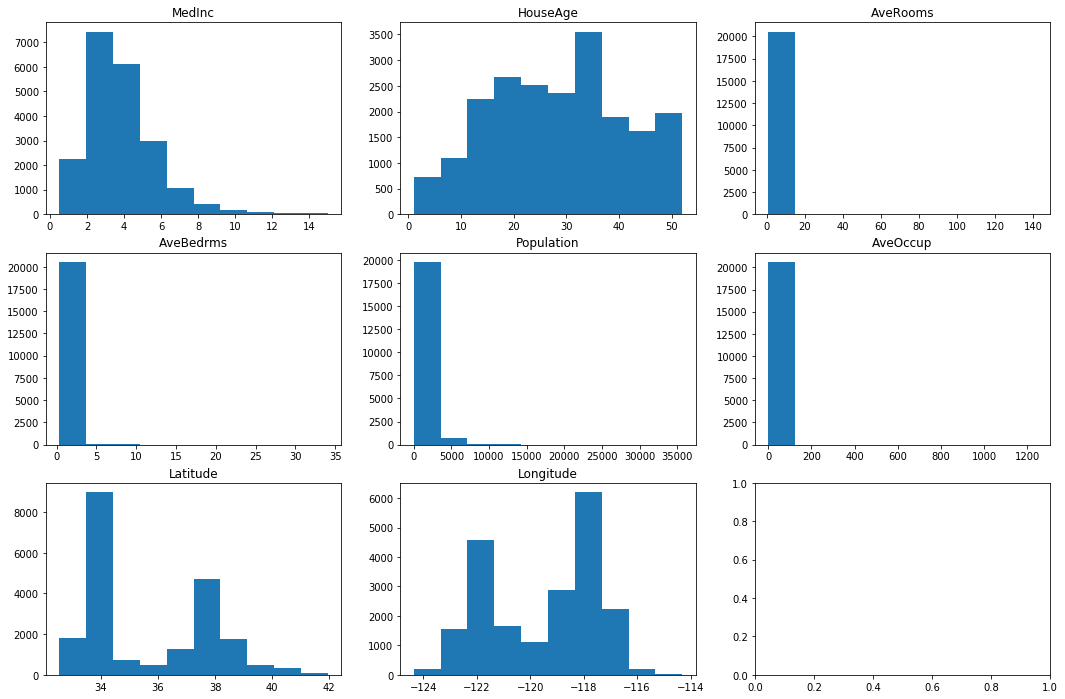

In [ ]:
plot_hist(df)